## Introduction
  
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. The original source for this data can be found on this http://insideairbnb.com/. In this article, we will explore this data to gain valuable insights into listings.

Let us start by loading up the necessary packages.

In [7]:
# Read data
import pandas as pd

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # contains functions that can create entire figures at once

# Configure visualizations
plt.rcParams['figure.figsize'] = [8, 4] # set the figure size to 8 width x 4 height
sns.set_theme(style='darkgrid') # set the grid color to dark

## Read Data

We can read the data from the CSV file into a dataframe. This data has already been cleaned up nicely and hence we don't need to do any pre-processing before analyzing it.

In [8]:
listings = pd.read_csv('data/AB_NYC_2019.csv')
listings.head()

# id (id of the listing)	name (name of the listing)	host_id	(id of the host)    host_name	neighbourhood_group	(Agamy - Region) 
#   neighbourhood(Bitash)	latitude	longitude	room_type	price	minimum_nights (the minimum nights to rent)	
#   number_of_reviews	last_review	    reviews_per_month	calculated_host_listings_count	availability_365 (Availability during the year)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Explore Data

There are many different questions we can explore with this data. Let us start by looking at the top neighborhoods with listings.

In [18]:
# Group by proper form - بجمع على اساس النيبرهود وبجمع بالكاونت
    # as_index=False = متخليش الجروبنج بتاعى هو الاندكس
by_neighbourhood = listings.groupby(
    ['neighbourhood'], as_index=False
).agg(
    nb_bookings = ('id', 'count')
)


# Other form for Group By
by_neighbourhood2 = listings.groupby(['neighbourhood'], as_index=False)['id'].count().rename(columns = {'id': 'nb_bookings'})


    
# sort_values(list of columns, boolean list of ascending sorting )
    # '.head(10)' = 'limit' statement in sql
top_10_neighbourhoods = by_neighbourhood.sort_values(by = ['nb_bookings'], ascending=[False]).head(10)
top_10_neighbourhoods


,neighbourhood,nb_bookings
214,Williamsburg,3920
13,Bedford-Stuyvesant,3714
94,Harlem,2658
28,Bushwick,2465
202,Upper West Side,1971
95,Hell's Kitchen,1958
64,East Village,1853
201,Upper East Side,1798
51,Crown Heights,1564
127,Midtown,1545


### Some related visuals : 
    - groupby().agg().reset_index()
    - sort_values()
<img src="data/image-1.webp" width="500" alt="Image Sample">
<img src="data/maxresdefault.jpg" width="500" alt="Image Sample">


Let us visualize the data using a horizontal bar plot.

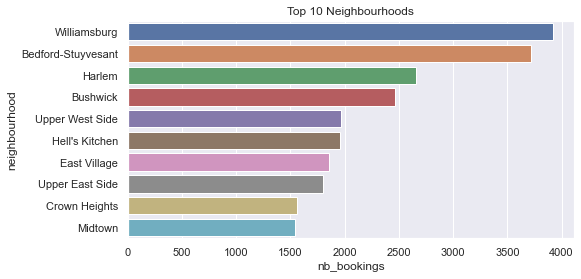

In [4]:
sns.barplot(data=top_10_neighbourhoods, y='neighbourhood', x='nb_bookings').set_title('Top 10 Neighbourhoods');

### Some related visuals : 
    - Matplotlib vs Seaborn
    - sns.barplot()
<img src="data/main-qimg-cc14375ac5016b3b71ad040e01d6c5e2-pjlq.jfif" width="500" alt="Image Sample">
<img src="data/matplot-vs-seaborn.png" width="500" alt="Image Sample">
<img src="data/seaborn-barplot-simple-syntax-explanation.webp" width="500" alt="Image Sample">



We can also visualize the top neighbourhoods as an interactive plot as well, using `plotly`. **Williamsburg** seems to have the most listings followed by **Bedford-Stuyvesant** and **Harlem**.

In [5]:
fig = px.bar(top_10_neighbourhoods, x="nb_bookings", y="neighbourhood")
fig.show(config={"displayModeBar": False})

How about the distribution of prices across neighbourhoods? Rather than looking at neighbourhoods, we will focus our attention on neighbourhood groups.

In [6]:
listings_lt_500 = listings[listings.price <= 500]
fig_price = px.violin(
    listings_lt_500, 
    x="neighbourhood_group", 
    y="price", 
    color='neighbourhood_group'
)
fig_price.show(config={"displayModeBar": False})